In [13]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%load_ext nb_black 

<IPython.core.display.Javascript object>

In [3]:
df = pd.read_csv("../data/clean/imdb_clean.csv").sort_values("GrossRevenue", ascending=False)[:1000]

[Text(0.5, 1.0, 'Percentage of Top 1000 US Grossing Movies by Genre')]

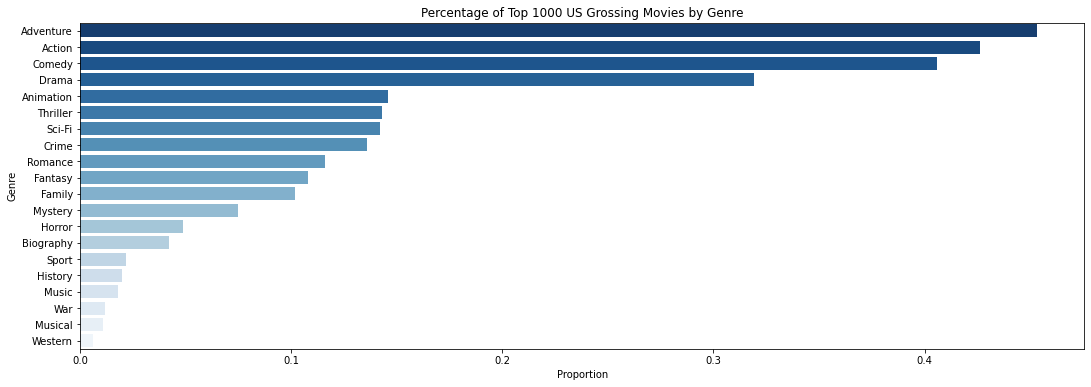

In [4]:
genre_props = (
    df[['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']]
    .mean()
    .reset_index()
    .rename(columns = {"index": "Genre", 0: "Proportion"})
    .sort_values("Proportion", ascending = False)
)

plt.figure(figsize=(18,6))
sns.barplot(data=genre_props,
            x = "Proportion",
            y = "Genre",
           orient = "h",
           palette = "Blues_r").set(title="Percentage of Top 1000 US Grossing Movies by Genre")

In [53]:
genre_props.columns

Index(['Genre', 'Proportion'], dtype='object')

In [27]:
genres = [
    'Action',
    'Adventure',
    'Animation',
    'Biography', 
    'Comedy',
    'Crime',
    'Drama',
    'Family', 
    'Fantasy', 
    'History', 
    'Horror', 
    'Music', 
    'Musical',
    'Mystery', 
    'Romance', 
    'Sci-Fi', 
    'Sport', 
    'Thriller', 
    'War', 
    'Western'
]

In [ ]:
counts_by_year_data = df.groupby("ReleaseYear")["Title"].count().reset_index()

In [ ]:
print(counts_by_year_data)

     Action  Adventure  Animation  Biography  Comedy  Crime  Drama  Family  \
0         0          0          0          0       0      0      0       0   
1         0          0          0          0       0      0      0       0   
2         0          0          0          0       0      0      0       0   
3         0          0          0          0       0      0      0       0   
4         0          0          0          0       0      0      0       0   
..      ...        ...        ...        ...     ...    ...    ...     ...   
163       1          1          0          0       0      0      0       1   
164       1          1          0          0       0      0      1       0   
165       1          1          0          0       0      1      0       0   
166       1          1          0          0       1      0      0       0   
167       1          1          1          0       0      0      0       0   

     Fantasy  History  ...  Music  Musical  Mystery  Romance  S

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86]),
 [Text(0, 0, '1935'),
  Text(1, 0, '1936'),
  Text(2, 0, '1937'),
  Text(3, 0, '1938'),
  Text(4, 0, '1939'),
  Text(5, 0, '1940'),
  Text(6, 0, '1941'),
  Text(7, 0, '1942'),
  Text(8, 0, '1943'),
  Text(9, 0, '1944'),
  Text(10, 0, '1945'),
  Text(11, 0, '1946'),
  Text(12, 0, '1947'),
  Text(13, 0, '1948'),
  Text(14, 0, '1949'),
  Text(15, 0, '1950'),
  Text(16, 0, '1951'),
  Text(17, 0, '1952'),
  Text(18, 0, '1953'),
  Text(19, 0, '1954'),
  Text(20, 0, '1955'),
  Text(21, 0, '1956'),
  Text(22, 0, '1957'),
  Text(23, 0, '1958'),
  Text(24, 0, '1959'),
  Text(25, 0, '1960'),
  Text(26, 0, 

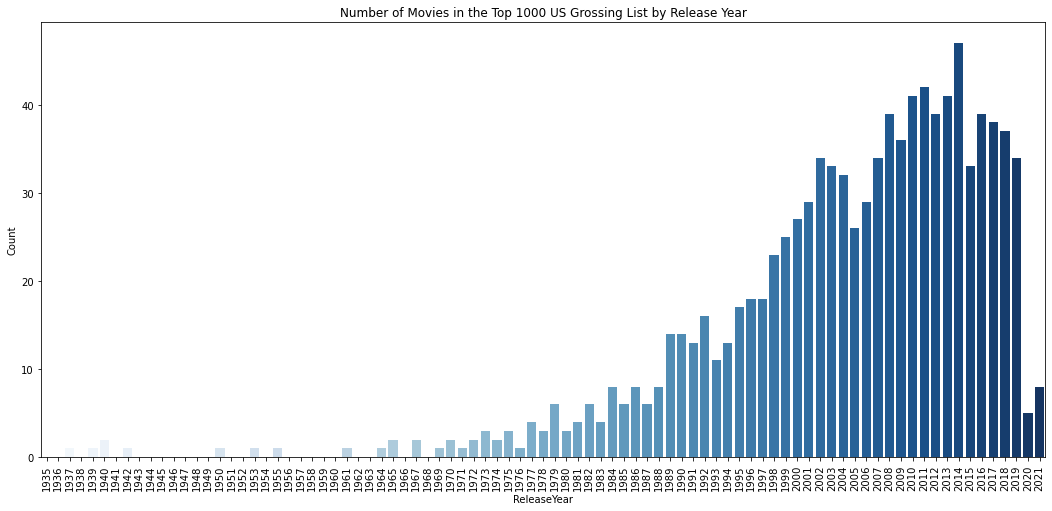

In [52]:
counts_by_year = {"ReleaseYear": list(range(1935,2022))}
counts_by_year = (pd
                  .DataFrame(counts_by_year)
                  .merge(counts_by_year_data,
                         on = "ReleaseYear",
                         how = "left")
                  .rename(columns = {"Title": "Count"}))

plt.figure(figsize=(18,8))
sns.barplot(data=counts_by_year,
            x = "ReleaseYear",
            y = "Count",
            palette = "Blues").set(title="Number of Movies in the Top 1000 US Grossing List by Release Year")
plt.xticks(rotation=90)

In [ ]:
counts_by_year_data2 = df.groupby(genres)["GrossRevenue"].sum().reset_index()

<AxesSubplot:xlabel='Genres'>

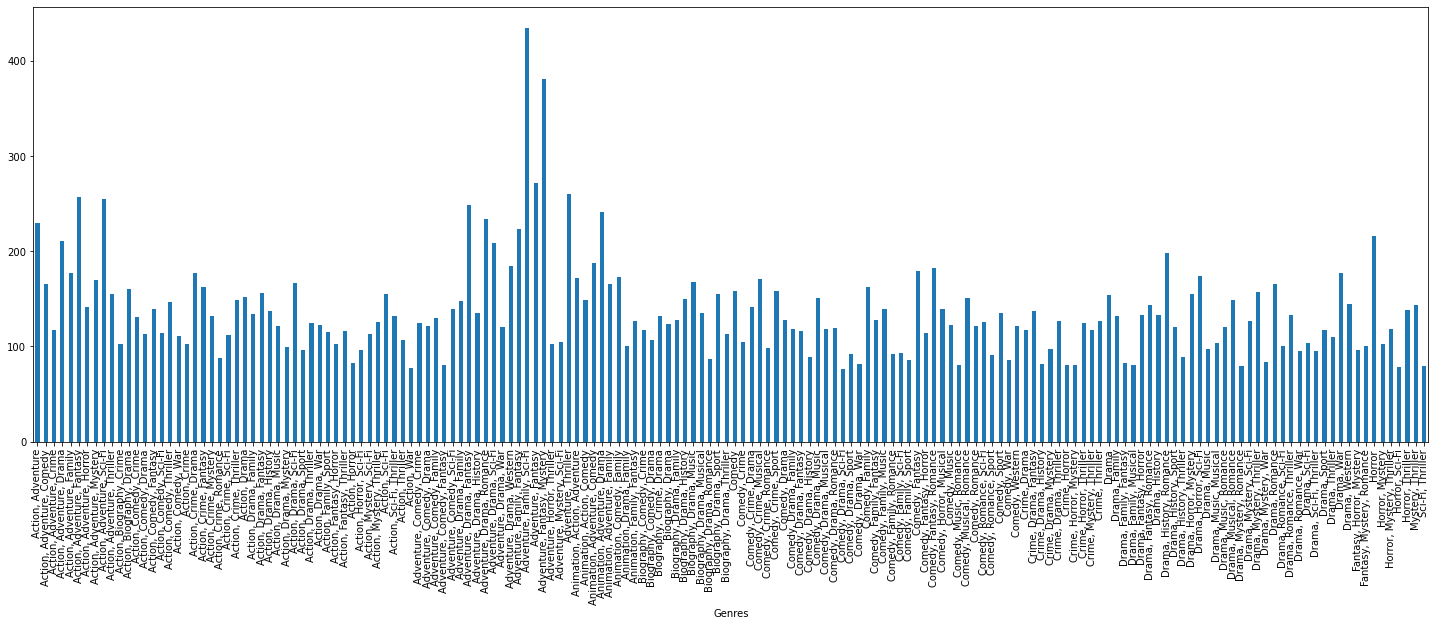

In [8]:
(
    df.groupby("Genres")["GrossRevenue"]
    .mean()
    .plot.bar(figsize=(25, 8))
)

In [ ]:
(
    df.groupby(["GrossRevenue", "ReleaseYear"])
    .plot.bar()
)

(
    df.groupby("ReleaseYear")[genres]
    .sum()
    .plot.bar(figsize=(25, 8))
)

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


<AxesSubplot:xlabel='Metascore', ylabel='GrossRevenue'>

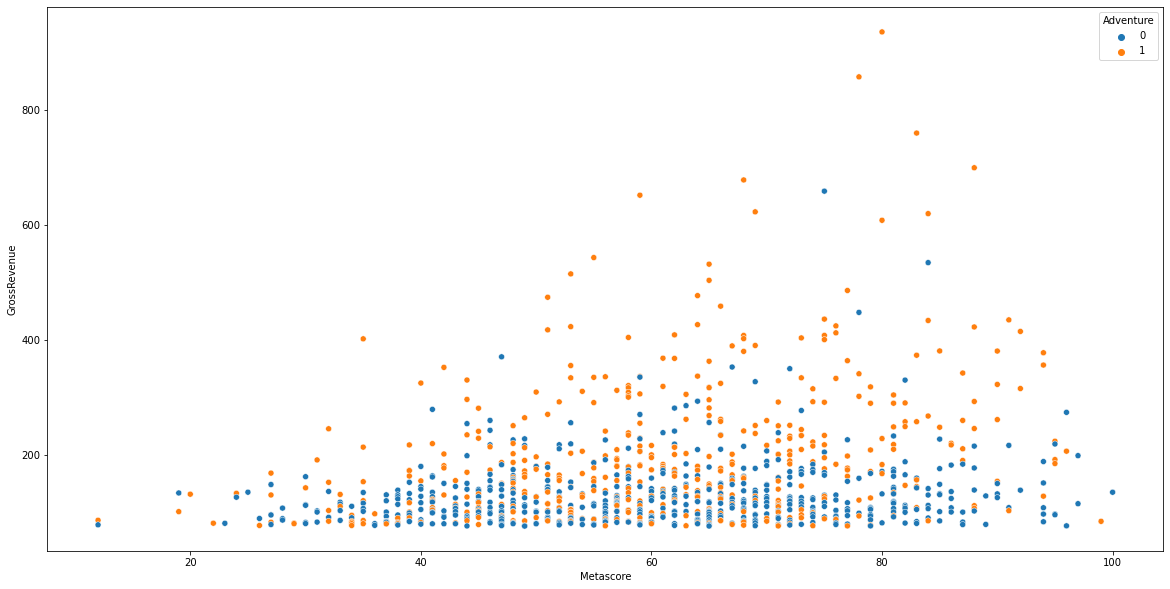

In [57]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=df, x="Metascore", y="GrossRevenue", hue="Adventure")

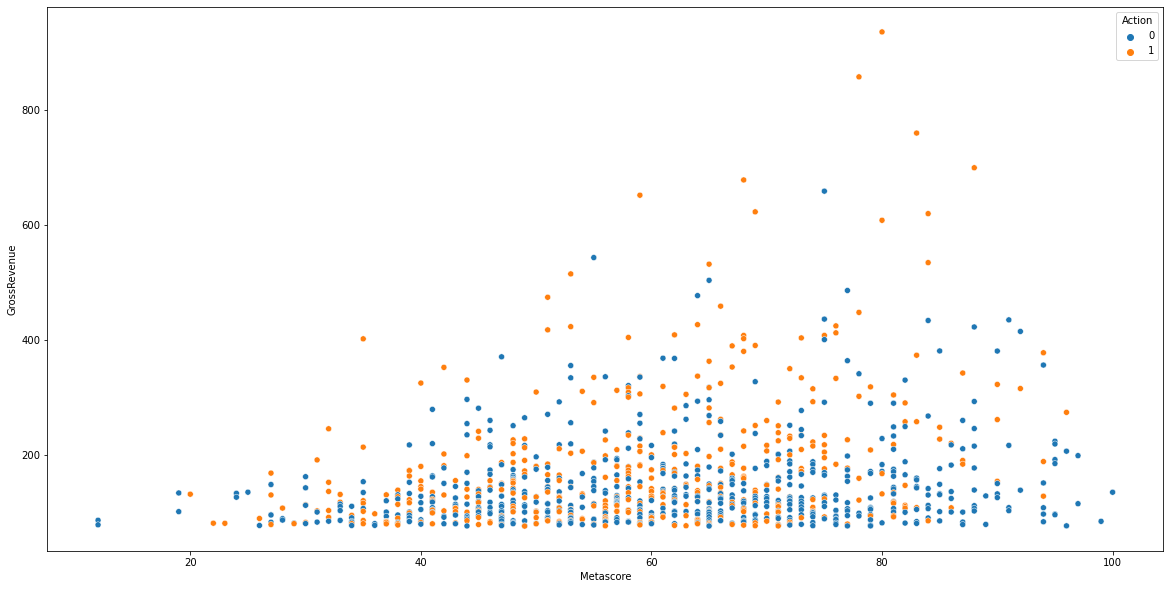

In [14]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=df, x="Metascore", y="GrossRevenue", hue="Action")

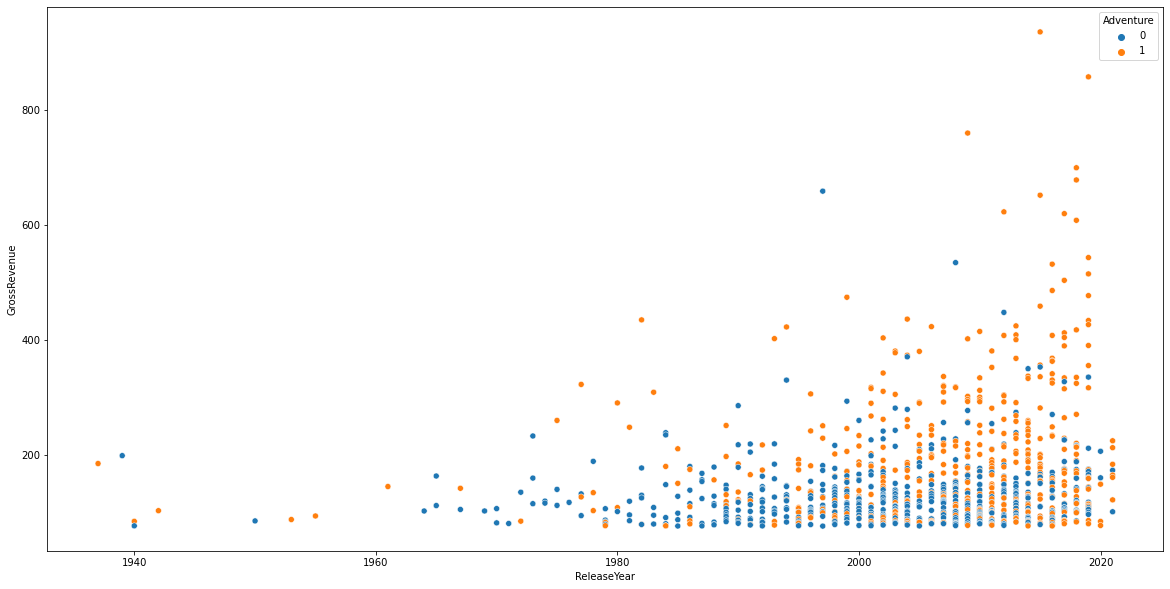

In [15]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=df, x="ReleaseYear", y="GrossRevenue", hue="Adventure")

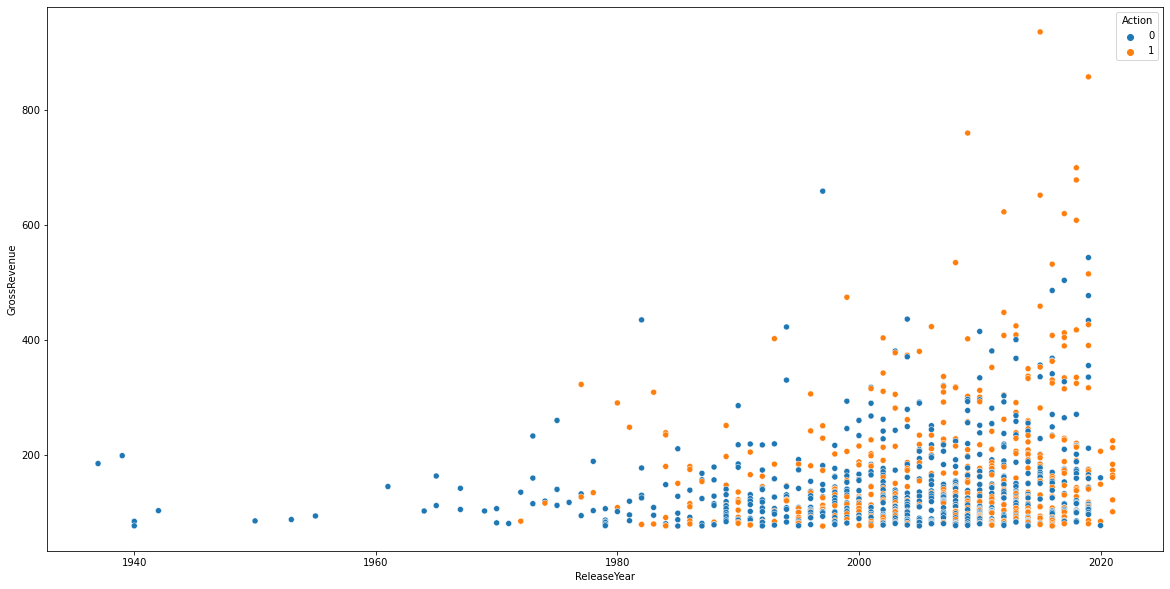

In [16]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=df, x="ReleaseYear", y="GrossRevenue", hue="Action")

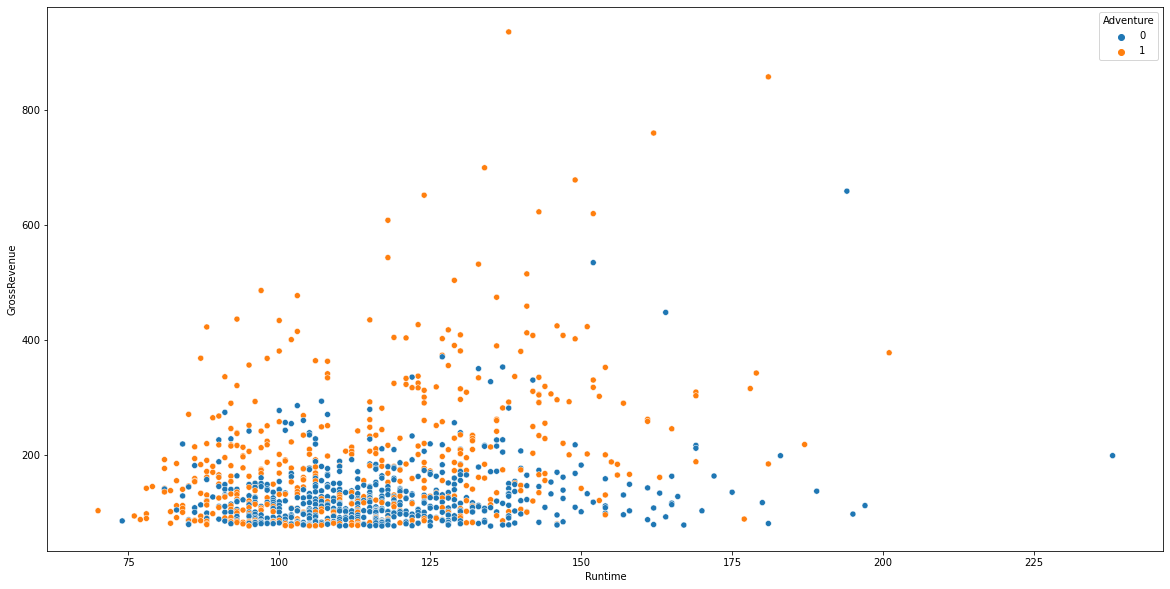

In [17]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=df, x="Runtime", y="GrossRevenue", hue="Adventure")

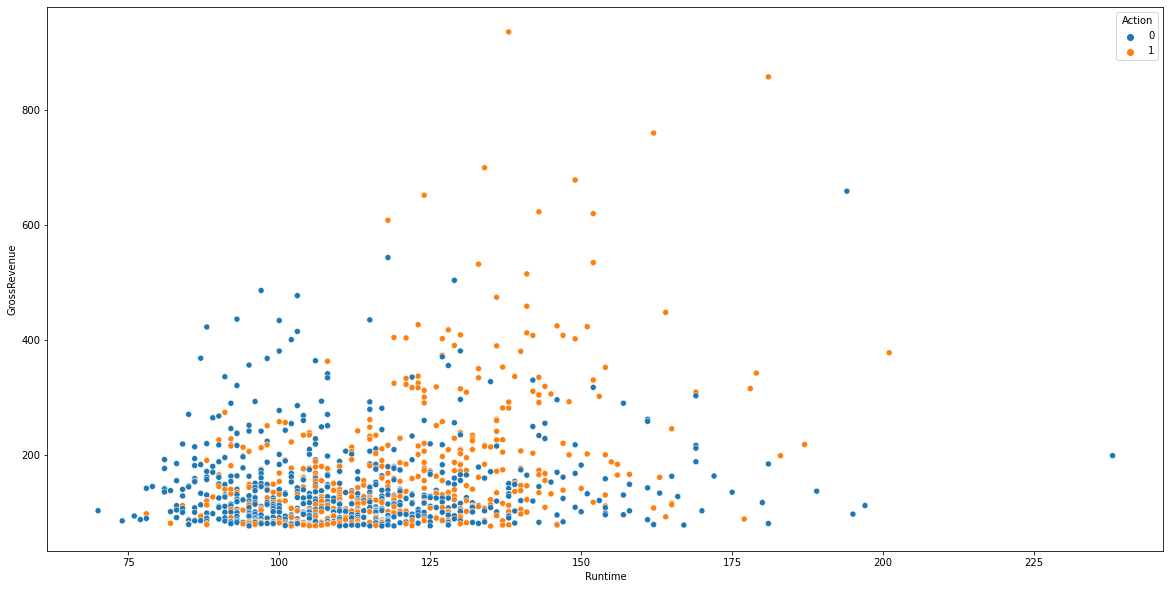

In [18]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=df, x="Runtime", y="GrossRevenue", hue="Action")